# 신경망 (Deep Neural Network)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

## 1. Tensor

**Tensor(텐서)** : 수치형 데이터를 위한 컨테이너입니다. 즉, 임의의 차원 개수를 가지는 행렬의 일반화된 모습입니다(다차원 배열).

### (1) 1D 텐서 : 벡터

In [2]:
x = np.array([12, 3, 6, 14, 7])
print(x)
print('차원 : ', x.ndim)

[12  3  6 14  7]
차원 :  1


### (2) 2D 텐서 : 행렬

In [3]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
print('차원 : ', x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
차원 :  2


### (3) 3D 텐서 : 고차원 텐서

In [4]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x)
print('차원 : ', x.ndim)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
차원 :  3


## 2. 신경망의 구조
<img src="./images/dnn_network.png" style="height:200px width:400px">

- 층(layer) : 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다.
- 가중치(weight) : 층의 상태이며, 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서입니다. 여기에는 네트워크가 학습한 지식이 들어 있습니다.
- 층의 네트워크 : 층을 쌓는 것입니다.
- 손실 함수(목적 함수) : 훈련하는 동안 최소화될 값입니다. 주어진 문제에 대한 성공 지표가 됩니다.
- 옵티마이저 : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지를 결정합니다. 특정 종류의 확률적 경사 하강법(SGD)을 구현합니다.

## 3. Keras

케라스는 딥러닝 모델을 간편하게 만들고 훈련시킬 수 있는 파이썬을 위한 딥러닝 프레임워크입니다.

케라스의 특징은 다음과 같습니다.
 - 동일한 코드로 CPU와 GPU에서 실행할 수 있습니다.
 - 사용하기 쉬운 API를 가지고 있어 딥러닝 모델의 프로토타입을 빠르게 만들 수 있습니다.
 - 합성곱 신경망, 순환 신경망을 지원하며 이 둘을 자유롭게 조합하여 사용할 수 있습니다.
 - 다중 입력이나, 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있습니다. 이 말은 적대적 생성 신경망부터 뉴럴 튜링 머신까지 케라스는 기본적으로 어떤 딥러닝 모델에도 적합하다는 뜻입니다.
 
구글, 넷플릭스, 우버, 썬, 옐프, 스퀘어 그리고 다양한 분야의 스타트업 수백 개가 케라스를 사용합니다. 머신 러닝 경연 웹사이트인 캐글에서도 케라스의 인기가 높습니다. 최근에 거의 모든 딥러닝 경련 대회의 우승자들이 케라스를 사용하고 있습니다.

<img src="http://snowdeer.github.io/assets/machine-learning/012.jpg" style="height:200px width:400px">

## 4. Keras의 DNN을 이용하여 MNIST 분류하기
### (1) 데이터 로딩

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [6]:
(train_images, train_labels), (test_images, test_labels) = \
    mnist.load_data()

In [7]:
print('학습셋 x : ', train_images.shape)
print('학습셋 y : ', train_labels.shape)
print('테스트셋 x : ', test_images.shape)
print('테스트셋 y : ', test_labels.shape)

학습셋 x :  (60000, 28, 28)
학습셋 y :  (60000,)
테스트셋 x :  (10000, 28, 28)
테스트셋 y :  (10000,)


In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
train_labels[0]

5

### (2) DNN 학습
 - 훈련 데이터 train_images, train_labels를 네트워크에 주입
 - 네트워크는 이미지와 레이블을 연관시킬수 있도록 학습됨
 - test_images에 대한 예측을 네트워크에 요청
 - 예측이 train_labels와 맞는지 확인

Layer는 주어진 문제에 더 의미있는 **표현(representation)** 을 입력된 데이터로부터 추출합니다. 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띄고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같습니다.

> 네트워크 구성

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

첫번째 층은 input이 784 차원이고, output이 512차원입니다.

마지막 층은 10개의 확률 점수가 들어 있는 배열을 반환하는 **softmax(소프트맥스)** 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

> 훈련을 위한 컴파일

 - 손실 함수(loss function) : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줍니다.
 - 옵티마이저(optimizer) : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
 - 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

> 데이터 스케일링

In [12]:
# 훈련을 시작하기 전에 모든 값을 0과 1 사이로 스케일을 조정
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
# 레이블
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


> 훈련

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.2557 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1046 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0694 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0501 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.0373 - acc: 0.9886


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 58us/step


In [18]:
print('test_acc', test_acc)

test_acc 0.9791


In [19]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 5. Keras의 DNN을 이용하여 영화 리뷰 분류하기 (Classification)

인터넷 영화 데이터베이스(internet movie database)로부터 가져온 리뷰 5만 개로 이루어진 IMDB 데이터셋을 이용하여 DNN 분류기를 생성하겠습니다.

### (1) IMDB 데이터셋 로딩

In [20]:
from keras.datasets import imdb

# 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용한다.
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words=10000)

In [21]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [22]:
train_labels[0]

1

각 단어는 id를 가지고 있습니다. id를 이용하여 리뷰를 문장으로 바꾸어 봅니다.

In [23]:
word_index = imdb.get_word_index()
# Word index는 dict입니다.
list(word_index.items())[:5]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

In [24]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
list(reverse_word_index.items())[:5]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani')]

In [25]:
# 리뷰를 디코딩한다. 0, 1, 2는 패딩/문서시작/사전에 없을을 위한 인덱스이기 때문에 3을 빼줌
decode_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### (2) 데이터 준비 (인코딩)

In [26]:
# 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다.

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension) 이고 모든 원소가 0인 행렬을 생성
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Result[i]에서 특정 인덱스의 위치를 1로 만든다.
        results[i, sequence] = 1.
    return results

In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [29]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [30]:
y_train = np.asarray(train_labels).astype('float')
y_test = np.asarray(test_labels).astype('float')

In [31]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [32]:
y_train[0]

1.0

### (3) 신경망 모델 생성

Dense 층에 전달하는 매개변수 $x$는 hidden unit의 개수가 $x$라는 의미입니다. 즉 가중치 행렬 $W$의 크기가 (input_dimension, $x$)라는 뜻입니다. 입력 데이터와 $W$를 벡터의 내적을 이용하여 연산을 하게 되면 입력 데이터가 16차원으로 표현된 공간으로 투영됩니다. 표현 공간의 차원을 신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도로 이해할 수 있습니다. 따라서 hidden unit의 수를 늘리면(표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있습니다.

Dense 층을 쌓을 때 필요한 두 가지 중요한 구조상의 결정
 - 얼마나 많은 층을 사용할 것인가?
 - 각 층에 얼마나 많은 hidden unit을 둘 것인가?
 
구조
 - 16개의 hidden unit을 가진 2개의 hidden layer
 - 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 3번째 층

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

___
**활성화 함수가 왜 필요한가?**

relu와 같은 활성화 함수(또는 비선형성, non-linearity)가 없다면 Dense 층은 선형적인 연산인 내적과 덧셈으로만 구성됩니다. 코드로 보면 다음과 같습니다. `output = dot(W, input) + b` 이렇게 나오면 해당 층은 입력에 대한 선형 변환(affine 변환)만을 학습할 수 있습니다. 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변환의 집합입니다. 이런 가설 공간은 매우 제약이 많으며, 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없습니다.

가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 합니다. Relu는 딥러닝에서 가장 인기 있는 활성화 함수 중에 하나입니다.
___

In [34]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### (4) 학습

In [35]:
from sklearn.model_selection import train_test_split

partial_x_train, x_val, partial_y_train, y_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [36]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 233us/step - loss: 0.4653 - acc: 0.8104 - val_loss: 0.3353 - val_acc: 0.8794
Epoch 2/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.2643 - acc: 0.9088 - val_loss: 0.2869 - val_acc: 0.8862
Epoch 3/20
20000/20000 [==============================] - 2s 88us/step - loss: 0.1989 - acc: 0.9312 - val_loss: 0.2953 - val_acc: 0.8758
Epoch 4/20
20000/20000 [==============================] - 2s 85us/step - loss: 0.1652 - acc: 0.9440 - val_loss: 0.2761 - val_acc: 0.8870
Epoch 5/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.1382 - acc: 0.9529 - val_loss: 0.3471 - val_acc: 0.8634
Epoch 6/20
20000/20000 [==============================] - 2s 85us/step - loss: 0.1180 - acc: 0.9598 - val_loss: 0.3133 - val_acc: 0.8796
Epoch 7/20
20000/20000 [==============================] - 2s 85us/step - loss: 0.1028 - acc: 0.9672 - val_loss: 0.3447 - val_acc

### (5) 훈련과 검증 손실 및 정확도 그리기

> Loss

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-o', label='Training loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

> Accuracy

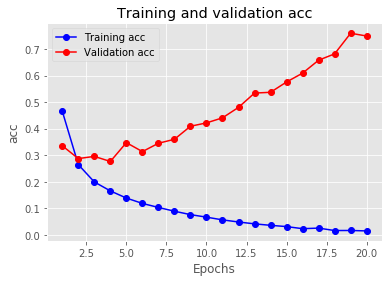

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-o', label='Training acc')
plt.plot(epochs, val_loss, 'r-o', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

현재 데이터의 경우는 과대적합(overfitting)이 발생한 상황입니다.

___
**과대적합을 막는 방법**
 - 네트워크 크기 축소 : 과대적합을 막는 가장 단순한 방법입니다. 모델의 크기, 즉 모델에 있는 학습 파라미터의 수를 줄이는 것입니다. 파라미터의 수는 layers의 수와 각 layer의 hidden unit의 수에 의하여 결정됩니다. 딥러닝에서 모델에 있는 학습 파라미터의 수를 종종 모델의 용량(capacity)라고 말합니다. 데이터에 알맞는 모델 크기를 찾으려면 각기 다른 구조를 검증 set에서 평가해 보아야 합니다. 일반적으로는 적은 수의 layer와 적은 수의 hidden unit에서부터 시작합니다.
 
 - 가중치 규제 추가 : 오캄의 면도날(어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론). 어떤 훈련 데이터와 네트워크 구조가 주여졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여러 개(여러 개의 모델)입니다. 여기서 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높습니다. 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델입니다. 즉 가중치가 작은 값을 가지도록 강제하는 모델입니다. 이로 인하여 파라미터 값의 분포가 더 균일하게 되고, 파라미터 값 분포의 엔트로피가 작게 됩니다. 이를 가중치 규제(weight regularization)라고 하며, 네트워크의 손실 함수에 연관된 비용을 추가합니다.
     - L1 규제 : 파라미터의 절대값에 비례하는 비용이 추가됩니다.
     - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됩니다.
 
 - Dropout 추가 : 드롭아웃은 신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나입니다. 네트워크 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킵니다(0으로 만듭니다). 하지만 학습 후 테스트 단계에서는 어떤 unit도 드롭아웃되지 않습니다. 그 대신에 층의 출력을 드롭아웃 비율에 비례하여 줄여 줍니다. 왜냐하면 훈련할 때보다 더 많은 unit이 활성화되기 때문입니다.
___

### (6) 가중치 규제 추가 적용하여 학습

L2 가중치를 추가한 모델을 생성합니다.

In [71]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2()))
l2_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2()))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [72]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

학습을 진행하며 과대적합여부를 살펴봅니다.

In [73]:
l2_history = l2_model.fit(
    partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 257us/step - loss: 0.7581 - acc: 0.7904 - val_loss: 0.6229 - val_acc: 0.8452
Epoch 2/20
20000/20000 [==============================] - 2s 122us/step - loss: 0.5627 - acc: 0.8764 - val_loss: 0.5388 - val_acc: 0.8720
Epoch 3/20
20000/20000 [==============================] - 3s 127us/step - loss: 0.5101 - acc: 0.8872 - val_loss: 0.5297 - val_acc: 0.8596
Epoch 4/20
20000/20000 [==============================] - 3s 140us/step - loss: 0.4760 - acc: 0.8916 - val_loss: 0.4893 - val_acc: 0.8758
Epoch 5/20
20000/20000 [==============================] - 2s 98us/step - loss: 0.4541 - acc: 0.8932 - val_loss: 0.4716 - val_acc: 0.8758
Epoch 6/20
20000/20000 [==============================] - 2s 120us/step - loss: 0.4370 - acc: 0.8950 - val_loss: 0.4666 - val_acc: 0.8712
Epoch 7/20
20000/20000 [==============================] - 2s 122us/step - loss: 0.4277 - acc: 0.8953 - val_loss: 0.4733 - va

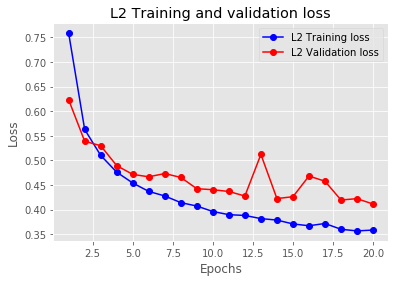

In [74]:
l2_history_dict = l2_history.history
l2_loss = l2_history_dict['loss']
l2_val_loss = l2_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, l2_loss, 'b-o', label='L2 Training loss')
plt.plot(epochs, l2_val_loss, 'r-o', label='L2 Validation loss')
plt.title('L2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

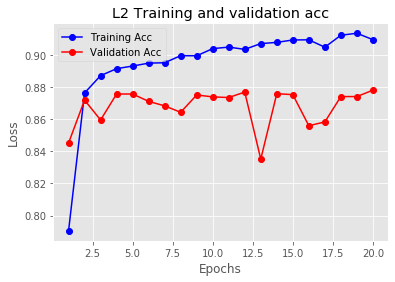

In [75]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

l2_acc = l2_history_dict['acc']
l2_val_acc = l2_history_dict['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, l2_acc, 'b-o', label='Training Acc')
plt.plot(epochs, l2_val_acc, 'r-o', label='Validation Acc')
plt.title('L2 Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### (7) Dropout 추가 적용하여 학습
Dropout을 추가하여 모델을 학습합니다.

In [44]:
do_model = models.Sequential()
do_model.add(layers.Dense(16, activation='relu'))
do_model.add(layers.Dropout(0.5))
do_model.add(layers.Dense(16, activation='relu'))
do_model.add(layers.Dropout(0.5))
do_model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
do_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

학습을 진행하며 과대적합 여부를 판단합니다.

In [46]:
do_history = do_model.fit(
    partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 113us/step - loss: 0.6061 - acc: 0.6812 - val_loss: 0.4815 - val_acc: 0.8524
Epoch 2/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.4733 - acc: 0.8032 - val_loss: 0.3852 - val_acc: 0.8774
Epoch 3/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.3938 - acc: 0.8545 - val_loss: 0.3377 - val_acc: 0.8724
Epoch 4/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.3387 - acc: 0.8878 - val_loss: 0.2960 - val_acc: 0.8876
Epoch 5/20
20000/20000 [==============================] - 2s 88us/step - loss: 0.2926 - acc: 0.9068 - val_loss: 0.2842 - val_acc: 0.8872
Epoch 6/20
20000/20000 [==============================] - 2s 89us/step - loss: 0.2571 - acc: 0.9186 - val_loss: 0.3049 - val_acc: 0.8832
Epoch 7/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.2289 - acc: 0.9290 - val_loss: 0.2904 - val_acc

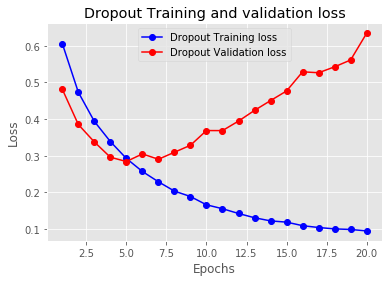

In [47]:
do_history_dict = do_history.history
do_loss = do_history_dict['loss']
do_val_loss = do_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, do_loss, 'b-o', label='Dropout Training loss')
plt.plot(epochs, do_val_loss, 'r-o', label='Dropout Validation loss')
plt.title('Dropout Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

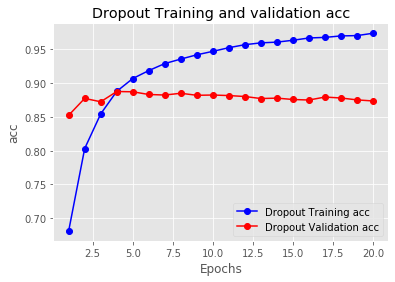

In [48]:
do_history_dict = do_history.history
do_acc = do_history_dict['acc']
do_val_acc = do_history_dict['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, do_acc, 'b-o', label='Dropout Training acc')
plt.plot(epochs, do_val_acc, 'r-o', label='Dropout Validation acc')
plt.title('Dropout Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

### (8) Prediction

새로운 모델에 대하여 예측을 하는 방법은 다음과 같습니다.

In [49]:
model.predict(x_test)

array([[0.01350514],
       [1.        ],
       [0.94708514],
       ...,
       [0.06980336],
       [0.00491353],
       [0.2844553 ]], dtype=float32)

> 처음 학습 모델의 최종 성능

In [50]:
_, acc = model.evaluate(x_test, y_test)
acc

25000/25000 [==============================] - 2s 74us/step


0.84676

> L2 적용 모델의 최종 성능

In [76]:
_, l2_acc = l2_model.evaluate(x_test, y_test)
l2_acc

25000/25000 [==============================] - 5s 186us/step


0.88104

> Dropout 적용 모델의 최종 성능

In [52]:
_, do_acc = do_model.evaluate(x_test, y_test)
do_acc

25000/25000 [==============================] - 2s 63us/step


0.87004

## 6. Keras의 DNN을 이용하여 보스턴 주택 가격 예측하기 (Regression)

### (1) 데이터 로딩

In [53]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [54]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [55]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

### (2) 데이터 scailing

In [56]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [57]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [58]:
partial_train_x, val_x, partial_train_y, val_y = \
    train_test_split(train_data, train_targets, test_size=0.2, random_state=42)

### (3) Dropout을 적용하여 모델 학습

In [59]:
do_model = models.Sequential()
do_model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
do_model.add(layers.Dropout(0.5))
do_model.add(layers.Dense(64, activation='relu'))
do_model.add(layers.Dropout(0.5))
do_model.add(layers.Dense(1))

In [60]:
do_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [61]:
do_history = do_model.fit(
    partial_train_x, partial_train_y, epochs=15, batch_size=64, validation_data=[val_x, val_y])

Train on 323 samples, validate on 81 samples
Epoch 1/15
323/323 [==============================] - 0s 1ms/step - loss: 615.1355 - mean_absolute_error: 22.8565 - val_loss: 458.3810 - val_mean_absolute_error: 20.1482
Epoch 2/15
323/323 [==============================] - 0s 44us/step - loss: 595.0456 - mean_absolute_error: 22.3929 - val_loss: 442.1359 - val_mean_absolute_error: 19.7339
Epoch 3/15
323/323 [==============================] - 0s 45us/step - loss: 574.6992 - mean_absolute_error: 21.8846 - val_loss: 426.1490 - val_mean_absolute_error: 19.3136
Epoch 4/15
323/323 [==============================] - 0s 59us/step - loss: 550.2793 - mean_absolute_error: 21.4078 - val_loss: 409.9798 - val_mean_absolute_error: 18.8758
Epoch 5/15
323/323 [==============================] - 0s 47us/step - loss: 536.5190 - mean_absolute_error: 21.0277 - val_loss: 393.1164 - val_mean_absolute_error: 18.4071
Epoch 6/15
323/323 [==============================] - 0s 53us/step - loss: 508.8611 - mean_absolute_e

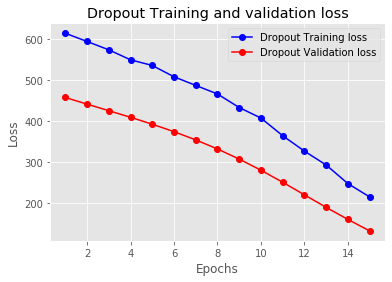

In [62]:
do_history_dict = do_history.history
do_loss = do_history_dict['loss']
do_val_loss = do_history_dict['val_loss']

epochs = range(1, len(do_loss) + 1)

plt.plot(epochs, do_loss, 'b-o', label='Dropout Training loss')
plt.plot(epochs, do_val_loss, 'r-o', label='Dropout Validation loss')
plt.title('Dropout Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

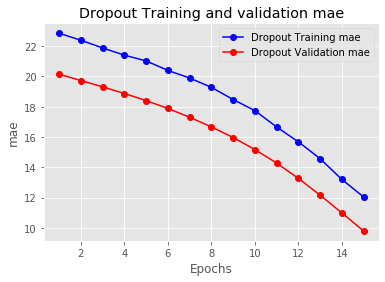

In [63]:
do_history_dict = do_history.history
do_mae = do_history_dict['mean_absolute_error']
do_val_mae = do_history_dict['val_mean_absolute_error']

epochs = range(1, len(do_mae) + 1)

plt.plot(epochs, do_mae, 'b-o', label='Dropout Training mae')
plt.plot(epochs, do_val_mae, 'r-o', label='Dropout Validation mae')
plt.title('Dropout Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

### (4) L2 규제화를 적용하여 학습

In [64]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(64, 
                          activation='relu', 
                          input_shape=(train_data.shape[1], ), 
                          kernel_regularizer=regularizers.l2()))
l2_model.add(layers.Dense(64, 
                          activation='relu',
                          kernel_regularizer=regularizers.l2()))
l2_model.add(layers.Dense(1))

In [65]:
l2_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [66]:
l2_history = l2_model.fit(
    partial_train_x, partial_train_y, epochs=15, batch_size=64, validation_data=[val_x, val_y])

Train on 323 samples, validate on 81 samples
Epoch 1/15
323/323 [==============================] - 0s 1ms/step - loss: 601.3030 - mean_absolute_error: 22.5638 - val_loss: 447.8407 - val_mean_absolute_error: 19.8846
Epoch 2/15
323/323 [==============================] - 0s 39us/step - loss: 577.5930 - mean_absolute_error: 22.0327 - val_loss: 427.5497 - val_mean_absolute_error: 19.3763
Epoch 3/15
323/323 [==============================] - 0s 36us/step - loss: 552.5320 - mean_absolute_error: 21.4724 - val_loss: 405.5666 - val_mean_absolute_error: 18.8199
Epoch 4/15
323/323 [==============================] - 0s 53us/step - loss: 524.9810 - mean_absolute_error: 20.8493 - val_loss: 380.7875 - val_mean_absolute_error: 18.1822
Epoch 5/15
323/323 [==============================] - 0s 48us/step - loss: 492.0087 - mean_absolute_error: 20.1036 - val_loss: 352.8376 - val_mean_absolute_error: 17.4417
Epoch 6/15
323/323 [==============================] - 0s 53us/step - loss: 455.0300 - mean_absolute_e

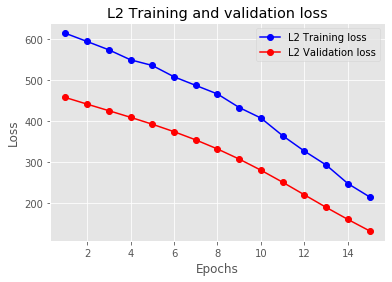

In [67]:
l2_history_dict = l2_history.history
l2_loss = l2_history_dict['loss']
l2_val_loss = l2_history_dict['val_loss']

epochs = range(1, len(l2_loss) + 1)

plt.plot(epochs, do_loss, 'b-o', label='L2 Training loss')
plt.plot(epochs, do_val_loss, 'r-o', label='L2 Validation loss')
plt.title('L2 Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

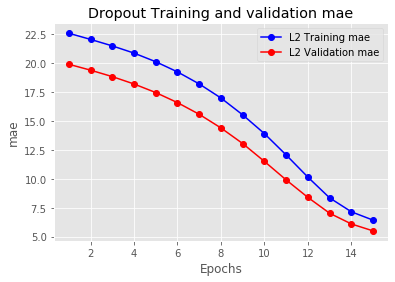

In [68]:
l2_history_dict = l2_history.history
l2_mae = l2_history_dict['mean_absolute_error']
l2_val_mae = l2_history_dict['val_mean_absolute_error']

epochs = range(1, len(l2_mae) + 1)

plt.plot(epochs, l2_mae, 'b-o', label='L2 Training mae')
plt.plot(epochs, l2_val_mae, 'r-o', label='L2 Validation mae')
plt.title('Dropout Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

### (5) Prediction

> Dropout을 이용한 모델의 최종 성능

In [69]:
_, acc = do_model.evaluate(test_data, test_targets)
acc

102/102 [==============================] - 0s 55us/step


11.577999152389227

> L2 규제화를 사용한 모델의 최종 성능

In [70]:
_, acc = l2_model.evaluate(test_data, test_targets)
acc

102/102 [==============================] - 0s 55us/step


6.579368797003054